In [65]:
%matplotlib notebook

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# Import the dataset

with open('/Users/Guzel/Documents/KAGGLE/Rental Listing Inquiries/train.json') as json_data:
    data = json.load(json_data)

In [3]:
# Transfer dictionary into the dataframe

df = pd.DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [5]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [7]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,"49,352.00","49,352.00","49,352.00","49,352.00","49,352.00","49,352.00"
mean,1.21,1.54,40.74,"7,024,054.66",-73.96,"3,830.17"
std,0.50,1.12,0.64,"126,274.61",1.18,"22,066.87"
min,0.00,0.00,0.00,"6,811,957.00",-118.27,43.00
25%,1.00,1.00,40.73,"6,915,887.50",-73.99,"2,500.00"
50%,1.00,1.00,40.75,"7,021,070.50",-73.98,"3,150.00"
75%,1.00,2.00,40.77,"7,128,733.25",-73.95,"4,100.00"
max,10.00,8.00,44.88,"7,753,784.00",0.00,"4,490,000.00"


In [19]:
bedrooms = df.bedrooms.value_counts().sort_index()
print(bedrooms)

0     9475
1    15752
2    14623
3     7276
4     1929
5      247
6       46
7        2
8        2
Name: bedrooms, dtype: int64


<IPython.core.display.Javascript object>


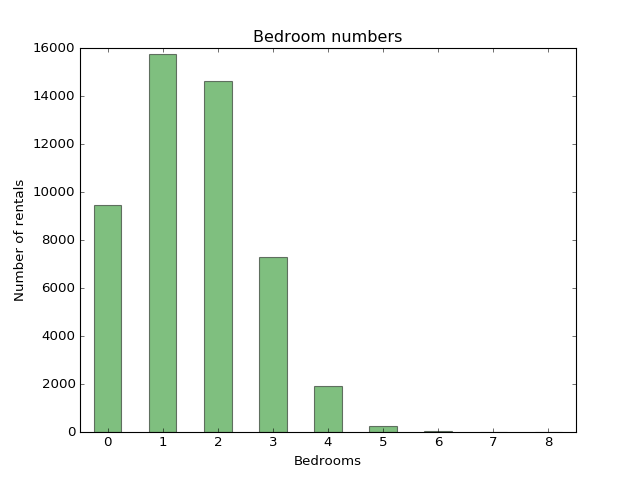

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

In [20]:
bedrooms.plot(kind='bar', color='green', alpha = 0.50)
plt.title('Bedroom numbers')
plt.xlabel('Bedrooms')
plt.ylabel('Number of rentals')
plt.xticks(rotation = 'horizontal')

In [21]:
bathrooms = df.bathrooms.value_counts().sort_index()
print(bathrooms)

0.00       313
1.00     39422
1.50       645
2.00      7660
2.50       277
3.00       745
3.50        70
4.00       159
4.50        29
5.00        20
5.50         5
6.00         4
6.50         1
7.00         1
10.00        1
Name: bathrooms, dtype: int64


<IPython.core.display.Javascript object>


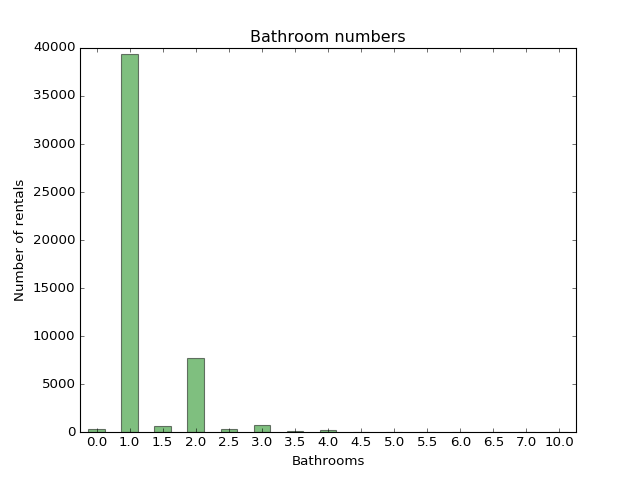

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

In [22]:
bathrooms.plot(kind='bar', color='green', alpha = 0.50)
plt.title('Bathroom numbers')
plt.xlabel('Bathrooms')
plt.ylabel('Number of rentals')
plt.xticks(rotation = 'horizontal')

In [27]:
# Interest level
interestLevel = df.groupby('interest_level').price.count().reindex([u'low', u'medium', u'high'])

<IPython.core.display.Javascript object>


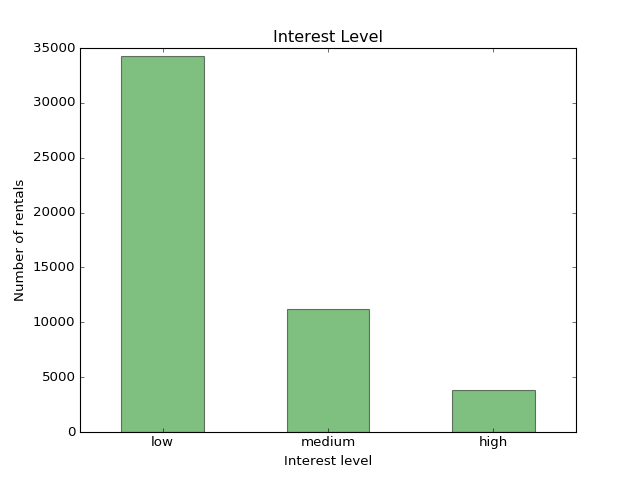

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

In [28]:
interestLevel.plot(kind='bar', color='green', alpha = 0.50)

plt.title('Interest Level')
plt.xlabel('Interest level')
plt.ylabel('Number of rentals')
plt.xticks(rotation = 'horizontal')
#plt.xticks([1,2,3,4])

In [35]:
df.groupby(['interest_level', 'bedrooms']).size()
# MAke a stacked graph
# x.plot(kind = 'bar', stacked=True)
# Check seaborn module

interest_level  bedrooms
high            0             847
                1             943
                2            1306
                3             592
                4             149
                5               2
low             0            6518
                1           11715
                2            9801
                3            4727
                4            1233
                5             243
                6              44
                7               1
                8               2
medium          0            2110
                1            3094
                2            3516
                3            1957
                4             547
                5               2
                6               2
                7               1
dtype: int64

# Outliers

In [42]:
# Working with outliers

df[df.price>1000000] 


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
12168,1.00,2,5d3525a5085445e7fcd64a53aac3cb0a,2016-06-24 05:02:58,,West 116th Street,"[Doorman, Elevator, Cats Allowed, Dogs Allowed...",low,40.80,7208794,-73.95,d1737922fe92ccb0dc37ba85589e6415,[],1150000,40 West 116th Street
32611,1.00,2,cd25bbea2af848ebe9821da820b725da,2016-06-24 05:02:11,,Hudson Street,"[Doorman, Elevator, Cats Allowed, Dogs Allowed...",low,40.73,7208764,-74.01,d1737922fe92ccb0dc37ba85589e6415,[],4490000,421 Hudson Street
55437,1.00,1,37385c8a58176b529964083315c28e32,2016-05-14 05:21:28,,West 57th Street,"[Doorman, Cats Allowed, Dogs Allowed]",low,40.77,7013217,-73.98,8f5a9c893f6d602f4953fcc0b8e6e9b4,[],1070000,333 West 57th Street
57803,1.00,1,37385c8a58176b529964083315c28e32,2016-05-19 02:37:06,This 1 Bedroom apartment is located on a prime...,West 57th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",low,40.77,7036279,-73.98,18133bc914e6faf6f8cc1bf29d66fc0d,[https://photos.renthop.com/2/7036279_924b52f0...,1070000,333 West 57th Street


### Date/Time

In [43]:
df.created.min()

'2016-04-01 22:12:41'

In [44]:
df.created.max()

'2016-06-29 21:41:47'

In [45]:
df['created'] = pd.to_datetime(df['created'])
df['day'] = df['created'].dt.day
df['month'] = df['created'].dt.month
df['hour'] = df['created'].dt.hour
df['dayOfWeek'] = df['created'].dt.dayofweek

In [46]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,day,month,hour,dayOfWeek
10,1.50,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.71,7211212,-73.94,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,24,6,7,4
10000,1.00,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.79,7150865,-73.97,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,12,6,12,6
100004,1.00,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.74,6887163,-74.00,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,17,4,3,6
100007,1.00,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.75,6888711,-73.97,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,18,4,2,0
100013,1.00,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.82,6934781,-73.95,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,28,4,1,3


In [49]:
dayOfWeekHigh = df[df.interest_level == 'high'].groupby(by = 'dayOfWeek').size()
print(dayOfWeekHigh)

dayOfWeek
0    338
1    632
2    722
3    637
4    649
5    510
6    351
dtype: int64


<IPython.core.display.Javascript object>


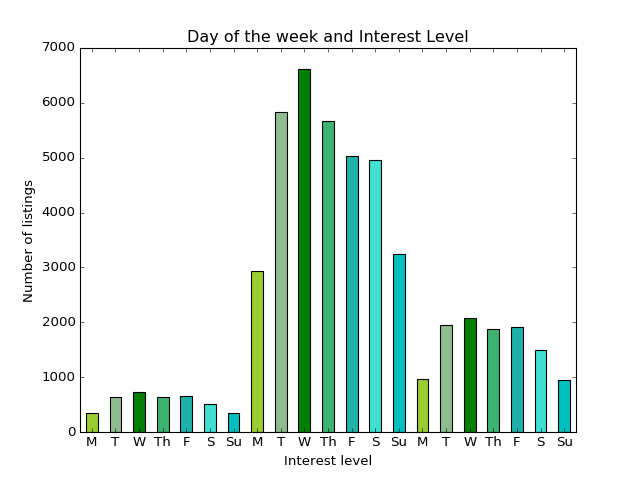

In [87]:
my_colors = ['yellowgreen', 'darkseagreen', 'green', 'mediumseagreen', 'lightseagreen', 'turquoise', 'c']
df.groupby(['interest_level', 'dayOfWeek']).size().plot(kind = 'bar', stacked = True, color = my_colors)
plt.title('Day of the week and Interest Level')
plt.xlabel('Interest level')
plt.ylabel('Number of listings')
plt.xticks(range(0,21), ['M','T','W','Th','F','S','Su']*3, rotation = 'horizontal')
plt.show()


<IPython.core.display.Javascript object>


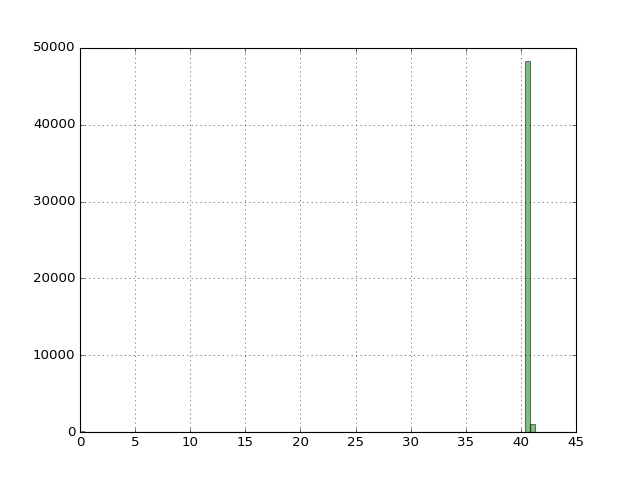

In [89]:
df.latitude.hist(bins = 100, color='green', alpha = 0.50)

### Latitude

40.5765 40.8962298
Number of outliers: 107


<IPython.core.display.Javascript object>


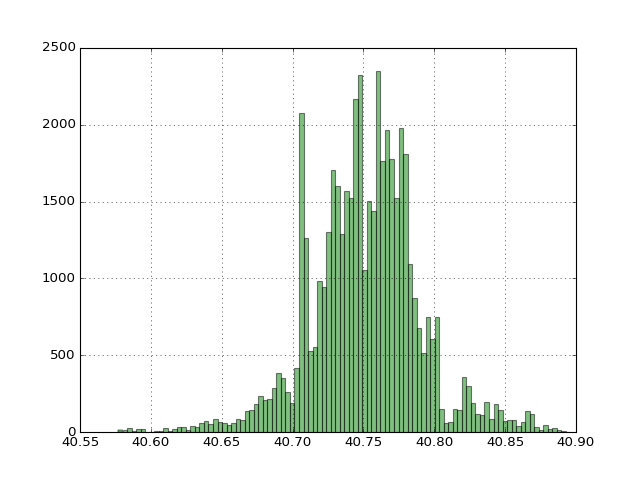

In [97]:
lat_min, lat_max = np.percentile(df.latitude, [0.1, 99.9]).tolist()
print (lat_min, lat_max)

df_lat = df[(df.latitude > lat_min) & (df.latitude < lat_max)]

print('Number of outliers: ' + str(df.bedrooms.count() - df_lat.bedrooms.count()))

df_lat.latitude.hist(bins = 100, color='green', alpha = 0.50)


### Longitude

<IPython.core.display.Javascript object>


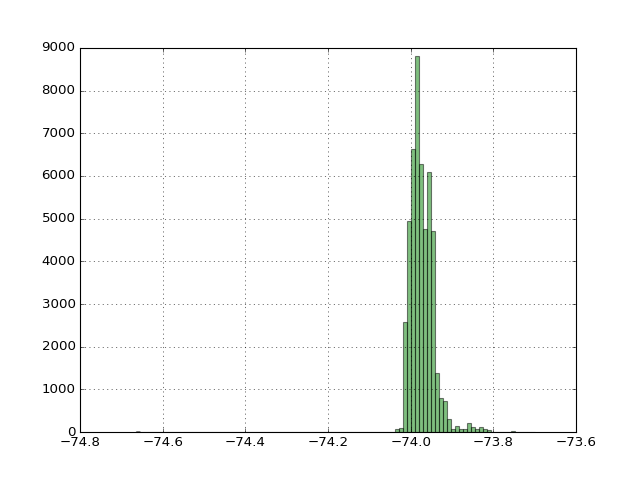

In [98]:
df_lat.longitude.hist(bins = 100, color='green', alpha = 0.50)

-74.0361298 -73.75491589999999
Number of outliers: 55


<IPython.core.display.Javascript object>


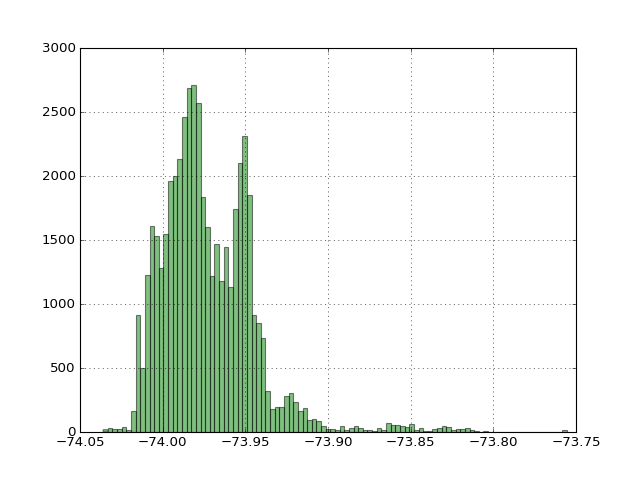

In [110]:
long_min, long_max = np.percentile(df.longitude, [0.1, 99.9]).tolist()
print (long_min, long_max)

df_long = df_lat[(df_lat.longitude > long_min) & (df_lat.longitude < long_max)]

print('Number of outliers: ' + str(df_lat.bedrooms.count() - df_long.bedrooms.count()))

df_long.longitude.hist(bins = 100, color='green', alpha = 0.50)

### Price

695.0 13000.0
Number of outliers: 500


<IPython.core.display.Javascript object>


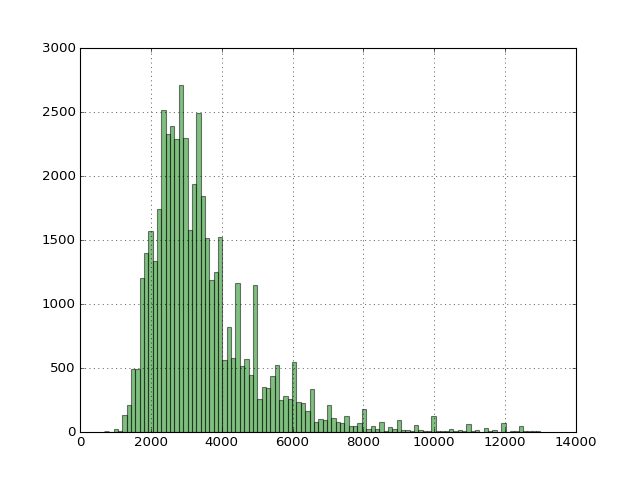

In [144]:
price_min, price_max = np.percentile(df.price, [0.01, 99]).tolist()
print (price_min, price_max)

df_price = df_long[(df_long.price > price_min) & (df_long.price < price_max)]
print('Number of outliers: ' + str(df_long.bedrooms.count() - df_price.bedrooms.count()))

df_price.price.hist(bins = 100, color='green', alpha = 0.50)

We should not delete the left tail of the destribution, since lower prices represent the roomates rates for the apartments, short term sublease, reduced rates, low income houses

In [138]:
pd.options.display.max_colwidth = 300
df[df.price < price_min][['description', 'price', 'interest_level']].sort_values('price')

,description,price,interest_level
53144,<p><a website_redacted,43,low
87511,<p><a website_redacted,45,low
117339,"Now available, absolutely stunning 1 bedroom 1 bathroom apartment located in the heart of the Upper West Side! Apartment is located in a 24-hour concierge, doorman/elevator building with a laundry facility on site! Unit features gorgeous open living room layout with good natural light, massive k...",401,low
102756,,695,medium
113599,,695,medium
113552,,695,medium
85617,,695,medium
22693,"Unfurnished or furnished room for rent in Queens\rPrivate room and bath. Shared kitchen.\rCable ready, internet, utilities included\rMale, Female, couple, pets ok. Quiet large room, living room\rRent from $125a week, One week + 1 week rent required\rAvailable now. Call today before it is rented.",700,high
109164,"1bdr in a 3 bdr apartment for short term with option to stay 5/15- 9/1 \rContact me for more details \r\r1 month broker fee \r\r$800 with all utilities included \r\remail, call, text anytime",800,high
61138,"A modern mid-rise elevator building located in the Belmont neighborhood in the Bronx. This elevator building has an on-site super, lobby with onsite laundry. Close to the B/D subway lines and the Metro North. The apartments have hardwood floors, white appliances, and the heat, hot water and gas ...",868,high


In [143]:
pd.options.display.max_colwidth = 50
df[df.price >= price_max][['description', 'price', 'interest_level']].sort_values('price')

,description,price,interest_level
75709,One of a kind corner penthouse apartment in on...,13000,low
21663,Come home to the massive 4bedroom 3.5 ...,13000,low
25237,Perfect UWS location near Central Park & Linco...,13000,low
107843,"Stunning penthouse 3br with amazing views, spr...",13000,low
7190,An Elegant and sophisticated 4.5 room rental a...,13000,low
92382,"A truly unique offering, this Historic and Lan...",13000,low
54687,Listed: 5/7/16 <br />Available: Immedi...,13000,low
84318,This is a rare opportunity to live in a newly ...,13000,low
58501,"Massive 2500 SF, 5 Bedrooms, 2 baths In the HE...",13000,low
44245,THIS RARELY AVAILABLE FLOOR-THRU 3 BED 3 BATH ...,13000,low
